## 課題１　

４年 高橋剛史

以下が関数です。

In [2]:
;cat lin_interp.jl

function my_lin_interp(grid,vals)
    function func(x::Real)
            lower_index = searchsortedlast(grid,x)
            if lower_index == 0  
            return "$x is external to grid ! It's too small."
            elseif lower_index == length(grid)
            return "$x is external to grid ! It's too big."
            else
                y_value =  (vals[lower_index+1] - vals[lower_index]) * (x - grid[lower_index]) /
                 (grid[lower_index+1] - grid[lower_index])  + vals[lower_index]
                return y_value
            end
        end
    
    function func{T<:Real}(x::AbstractVector{T})
        n = length(x)
        out = Array(Any, n)
        for i in 1 : n
                out[i] = func(x[i])
        end
        return out
    end
    
    return func
end


実際に数値を入れてみると以下のようになります。エラーがどこででているか分かるようにしています。

In [4]:
include("lin_interp.jl")
grid =[0, 10, 20,30,40,50,100]
vals = [2,4,10,0.3,5,-20,60]
f = my_lin_interp(grid,vals)

println(f(12))
println(f(40))
println(f(-20))
println(f(101))
println(f([1, 32, 70,84 ,90]))
println(f([1, 104, 65, -50]))

5.2
5.0
-20 is external to grid ! It's too small.
101 is external to grid ! It's too big.
Any[2.2,1.24,12.0,34.4,44.0]
Any[2.2,"104 is external to grid ! It's too big.",4.0,"-50 is external to grid ! It's too small."]


次に以下のような関数g(x)を考え、残差を見ます。

In [5]:
g(x)=2 .*cos(3x) .+sin(15x) .+ 1.5　

g (generic function with 1 method)

g(x)のグラフ、
0.1,0.05,0.01刻みの線形補間のグラフ
は以下のようになります。

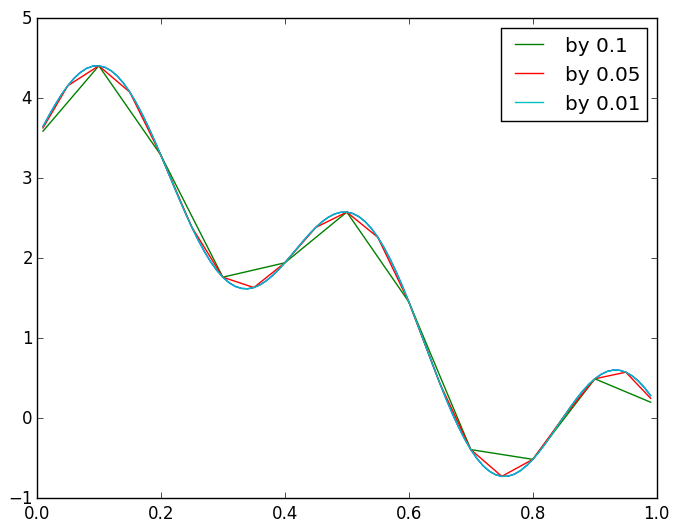

PyObject <matplotlib.legend.Legend object at 0x31994dcd0>

In [7]:
a_grid = 0:0.1:1
b_grid = 0:0.05:1
c_grid = 0:0.01:1
Afa = my_lin_interp(a_grid,g(a_grid))
Afb = my_lin_interp(b_grid,g(b_grid))
Afc = my_lin_interp(c_grid,g(c_grid))
using PyPlot
x = Array(Float64,99)
x =(1:99)/100
plot(x,g(x))
plot(x,Afa(x),label="by 0.1")
plot(x,Afb(x),label="by 0.05")
plot(x,Afc(x),label="by 0.01")
legend()

残差は以下のようになります。

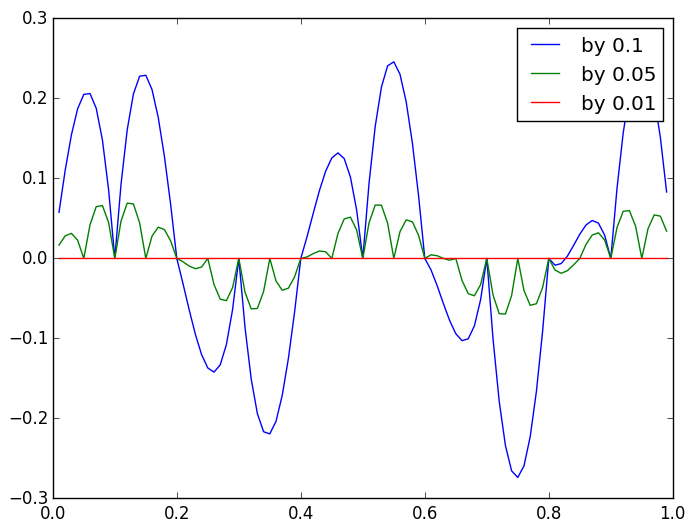

PyObject <matplotlib.legend.Legend object at 0x319ab0090>

In [8]:
residuala(x)=g(x)-Afa(x)
residualb(x)=g(x)-Afb(x)
residualc(x)=g(x)-Afc(x)
plot(x,residuala(x),label="by 0.1")
plot(x,residualb(x),label="by 0.05")
plot(x,residualc(x),label="by 0.01")
legend()